In [163]:
import numpy as np
import pandas as pd
import xlrd
import math
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

Y = 0
I = 1
C = 2
J = 3
E = 4
N = 5

In [164]:
def reading(files, prices):
    files[Y] = pd.read_excel('GDP_' + prices + '.xls')
    files[I] = pd.read_excel('Import_' + prices + '.xls')
    files[C] = pd.read_excel('Final_consumption_expenditure_' + prices + '.xls')
    files[J] = pd.read_excel('Gross_capital_formation_' + prices + '.xls')
    files[E] = pd.read_excel('Export_' + prices + '.xls')
    files[N] = pd.read_excel('Population.xls')
    return files

In [165]:
def number_to_column(number):
    if number == Y:
        return 'Y'
    elif number == I:
        return 'I'
    elif number == C:
        return 'C'
    elif number == J:
        return 'J'
    elif number == E:
        return 'E'
    elif number == N:
        return 'N'
    else:
        return str(number)

In [166]:
def upgrade_data(files):
    
    k = 0
    answer = pd.DataFrame(columns = ['date'])
    while k < 6:
        index = pd.Index(files[k]['Country Name'])
        i = index.get_loc('India')
        df = files[k].iloc[[i]]
        df = df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
        name = number_to_column(k)
        df = pd.DataFrame.transpose(df)
        df.columns = [name]
        df['date'] = df.index
        if k == 0:
            answer['date'] = df['date']
        answer = pd.merge(answer, df, how='outer', on='date')
        if k == N:
            answer[name] = answer[name].dropna() / 1000000
        else:
            answer[name] = answer[name].dropna() / 1000000000
        k += 1
    answer.head(n=5)
    dates = {}
    for i in range(1960, 1970):
        dates[i - 1960] = str(i)
    answer = answer.drop(index=dates)
    answer = answer.dropna()
    return answer

In [167]:
files_curr= {}
files_const = {}
files_curr = reading(files_curr, 'curr')
files_const = reading(files_const, 'const')


X_curr = upgrade_data(files_curr)
X_const = upgrade_data(files_const)
X_curr.head(n=5)
    

,date,Y,I,C,J,E,N
10,1970,461.923504,18.117348,409.408960,77.964782,17.657331,553.578513
11,1971,494.513384,20.012885,444.942218,88.233654,18.325339,566.224812
12,1972,545.083934,20.441875,488.489143,89.143620,22.183829,579.411513
13,1973,663.437021,31.685406,583.138132,128.147490,28.215837,593.058926
14,1974,783.190177,47.677756,706.601080,152.752454,38.235948,607.050255


# Part I

#### Task 1

,Y,I,C,J,E
date,,,,,
1970,0.046221,0.038114,0.051702,0.042867,0.039553
1971,0.048682,0.035671,0.054638,0.044770,0.040622
1972,0.053959,0.037137,0.059565,0.047403,0.045432
1973,0.063579,0.053262,0.069618,0.057052,0.055053
1974,0.074177,0.091866,0.084792,0.071697,0.068950


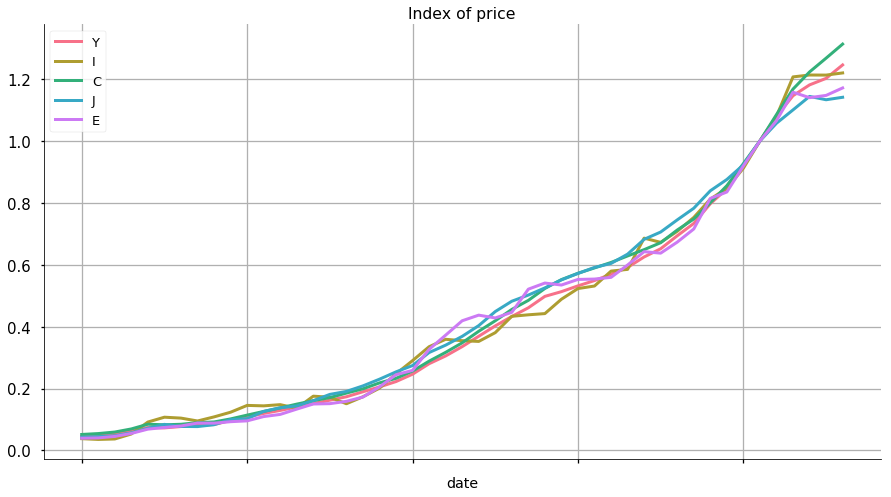

In [168]:
price_index = pd.DataFrame(columns = ['date', 'Y', 'I', 'C', 'J', 'E'])
price_index['date'] = X_curr['date']
i = 0
while i < 5:
    name = number_to_column(i)
    price_index[name] = X_curr[name] / X_const[name]
    i += 1
    
sb.set_context("talk", rc={"lines.linewidth": 3})
sb.set_palette("husl", 5)

price_index.index = price_index['date']
price_index = price_index.drop(columns=['date'])

fig = price_index.plot(figsize=(15, 8), title='Index of price', fontsize=15)

fig.grid()
sb.despine()
price_index.head(n=5)

#### Task 2

,Y,I,C,J,E
date,,,,,
1970,0.834432,0.032728,0.739568,0.140838,0.031897
1971,0.873352,0.035344,0.785805,0.155828,0.032364
1972,0.940754,0.035280,0.843078,0.153852,0.038287
1973,1.118670,0.053427,0.983272,0.216079,0.047577
1974,1.290157,0.078540,1.163991,0.251631,0.062986


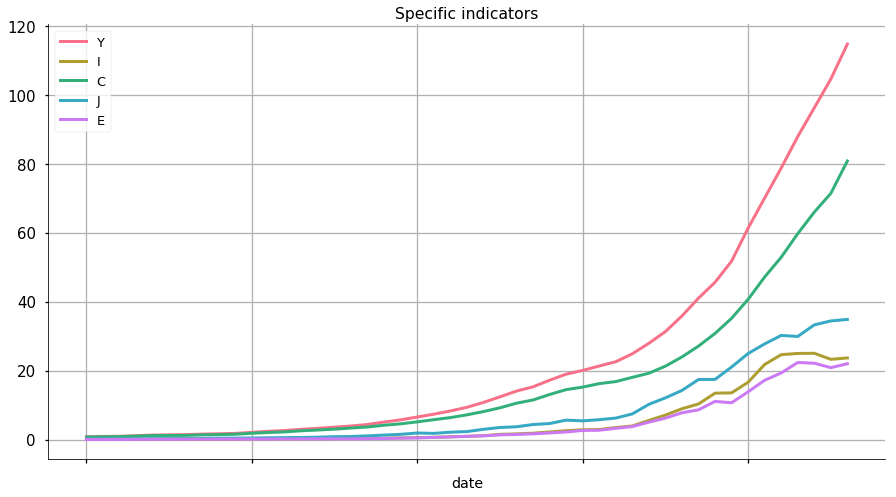

In [169]:
spec_ind = pd.DataFrame(columns = ['date', 'Y', 'I', 'C', 'J', 'E'])
spec_ind['date'] = X_curr['date']
i = 0
while i < 5:
    name = number_to_column(i)
    spec_ind[name] = X_curr[name] / X_curr['N']
    i += 1
    
sb.set_context("talk", rc={"lines.linewidth": 3})
sb.set_palette("husl", 5)

spec_ind.index = spec_ind['date']
spec_ind = spec_ind.drop(columns=['date'])

figure = spec_ind.plot(figsize=(15, 8), title='Specific indicators', fontsize=15)
figure.grid()
sb.despine()

spec_ind.head(n=5)

#### Task 3

Mean =  -3.2161477321170935


,value
date,
1970,-5.205853
1971,-7.186210
1972,-6.063522
1973,-6.384348
1974,-8.030343


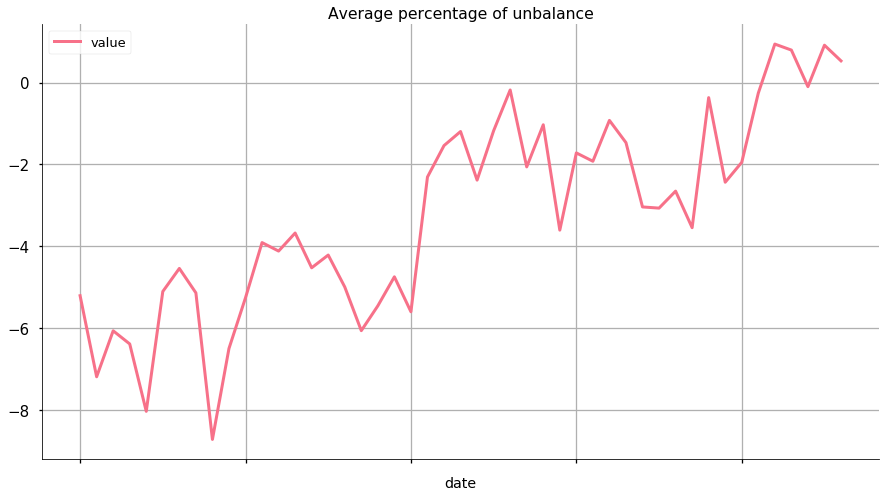

In [170]:
bal_per_curr = pd.DataFrame(columns = ['date', 'value'])
bal_per_curr['date'] = X_curr['date']
bal_per_curr['value'] = ((X_curr['Y'] + X_curr['I']) - (X_curr['C'] + X_curr['J'] + X_curr['E'])) / (X_curr['Y'] + X_curr['I']) * 100

sb.set_context("talk", rc={"lines.linewidth": 3})
sb.set_palette("husl", 5)

bal_per_curr.index = bal_per_curr['date']
bal_per_curr = bal_per_curr.drop(columns=['date'])

figure = bal_per_curr.plot(figsize=(15, 8), title='Average percentage of unbalance', fontsize=15)
figure.grid()
sb.despine()

print('Mean = ', bal_per_curr['value'].mean() )
bal_per_curr.head(n=5)

# Part II

In [171]:
mu = 0.03
lam = 0.015
a = 0.01
b = 0.1
gamma = 0.05
eps = 0.1

In [189]:
X_curr['date'] = pd.to_datetime(X_curr['date'], format="%Y")
X_curr.index = X_curr['date']
X_curr.head(n=3)

,date,Y,I,C,J,E,N
date,,,,,,,
1970-01-01,1970-01-01,461.923504,18.117348,409.408960,77.964782,17.657331,553.578513
1971-01-01,1971-01-01,494.513384,20.012885,444.942218,88.233654,18.325339,566.224812
1972-01-01,1972-01-01,545.083934,20.441875,488.489143,89.143620,22.183829,579.411513


#### (1) Капитал K(t)

In [174]:
# параметры kappa, К0
t0 = 2000
i = 1970
K0 = 0
while(i <= t0):
    K0 = K0 + X_curr['J'][str(i) + '-01-01'] * math.exp(-mu*(t0 - i))
    i = i + 1
kappa = K0 / X_curr['Y'][str(t0) + '-01-01']
print ("kappa = ", kappa)

kappa =  1.8483647864083605


In [175]:
# значения затрат капитала K(t)
K = pd.DataFrame(columns = ['date', 'value'])
K['date'] = X_curr['date']
#K['date'] = pd.to_datetime(Q['date'])
K.index = K['date']
K = K.drop(columns=['date'])
K['value'] = X_curr['J'] * (1 - mu)
K['value']['1970'] = X_curr['J'][str(1970)]
K['value'] = K['value'].rolling(2).sum()
K['value']['1970'] = X_curr['J'][str(1970)]
K.head(n=5)
#figure = K.plot(figsize=(16, 8), title='K', fontsize=15)
#figure.grid()
#sb.despine()

,value
date,
1970-01-01,77.964782
1971-01-01,163.551426
1972-01-01,172.055955
1973-01-01,210.772377
1974-01-01,272.472946


In [176]:
# Данные об экономически активном населении L_stat

L_stat = pd.read_excel('Economical_active_population.xlsx')
L_stat['date'] = pd.to_datetime(L_stat['date'], format='%Y')
L_stat.index = L_stat['date']
L_stat['L_stat'] = L_stat['value'] / 1000000
L_stat = L_stat.drop(columns=['value', 'date'])
L_stat.head(n=5)

,L_stat
date,
1990-01-01,327.611171
1991-01-01,335.307428
1992-01-01,343.350822
1993-01-01,351.839869
1994-01-01,360.945118


In [177]:
# значения затрат труда L(t) = L0 * exp(lambda * (t-t0)) 
# L0 = L(t0)

L0 = 405 #http://data.trendeconomy.ru/dataviewer/wb/wbd/wdi?kf=WDI&time_period=2000&ref_area=IND&series=SL_TLF_TOTL_IN
L = pd.DataFrame(columns = ['date', 'L'])
L['date'] = X_curr['date']
L['date'] = pd.to_datetime(L['date'])
L.index = L['date']
L = L.drop(columns=['date'])
L['L'][str(t0)] = L0
i = 1970
while i <= 2016:
    L['L'][str(i)] = L0 * (math.exp(lam * (i-t0)))
    i = i + 1
L.head(n=5)

,L
date,
1970-01-01,258.239
1971-01-01,262.142
1972-01-01,266.104
1973-01-01,270.126
1974-01-01,274.208


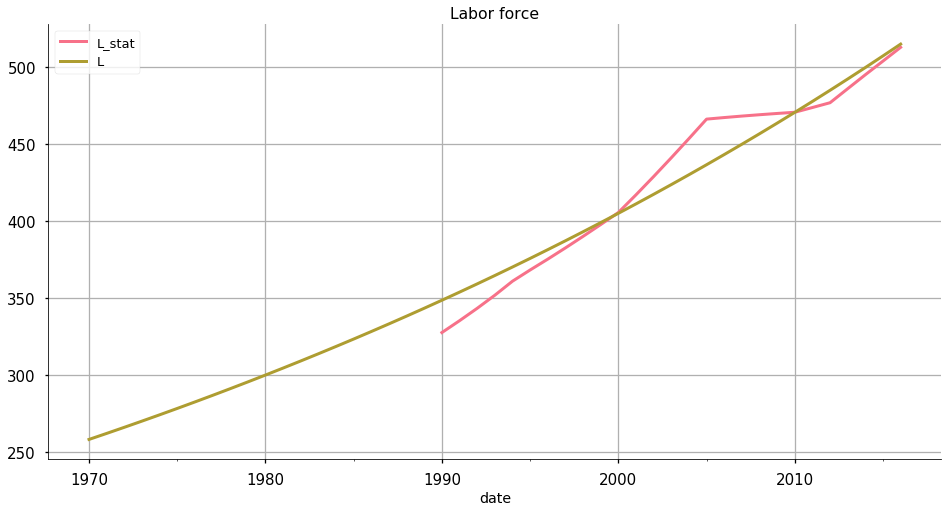

In [178]:
# По графикам видно, что константа lambda = 0.15 приближает 
# рассчитанные значения к реальным

figure = L_stat.plot(figsize=(16, 8), title='Labor force', fontsize=15)
L.plot(ax=figure)
figure.grid()
sb.despine()

#### (2) Валовой внутренний продукт Y(t)

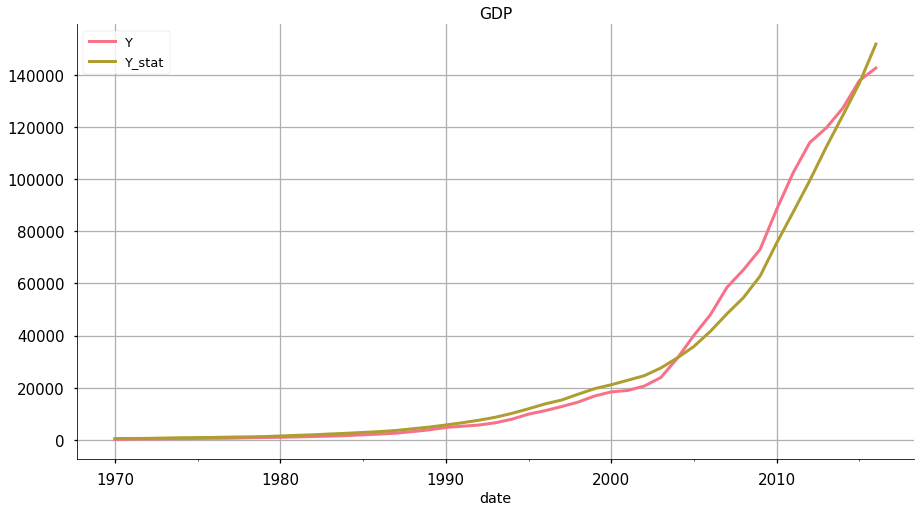

In [179]:
# Производственная функция CES

Y0 = 3 * X_curr['Y'][str(t0) + '-01-01']
Y = X_curr
Y = Y.drop(columns = ['date', 'I', 'C', 'J', 'E', 'N'])
Y['L'] = L['L'] / L0
Y['K'] = K['value'] / K0
Y['Y_stat'] = Y['Y']
    
Y['Y'] = Y0 * ((a * ((Y['L'])**(-b)) + (1-a) * ((Y['K'])**(-b)))**(-1/b))

Y = Y.drop(columns=['L', 'K'])

figure = Y.plot(figsize=(15, 8), title='GDP', fontsize=15)
figure.grid()
sb.despine()
    
#Y.head(n=50)

In [180]:
def graph(df, cmp):
    figure1 = plt.figure(figsize=(20, 8))
    layout = (1, 4)
    fig_start = plt.subplot2grid(layout, (0, 0), colspan=2)
    fig_end = plt.subplot2grid(layout, (0, 2), colspan=2)
    cmp.plot(ax=fig_start, alpha=1)
    df.plot(ax=fig_end, alpha=1)
    sb.despine()
    fig_start.grid()
    fig_end.grid()

#### (3) Экспорт E(t)

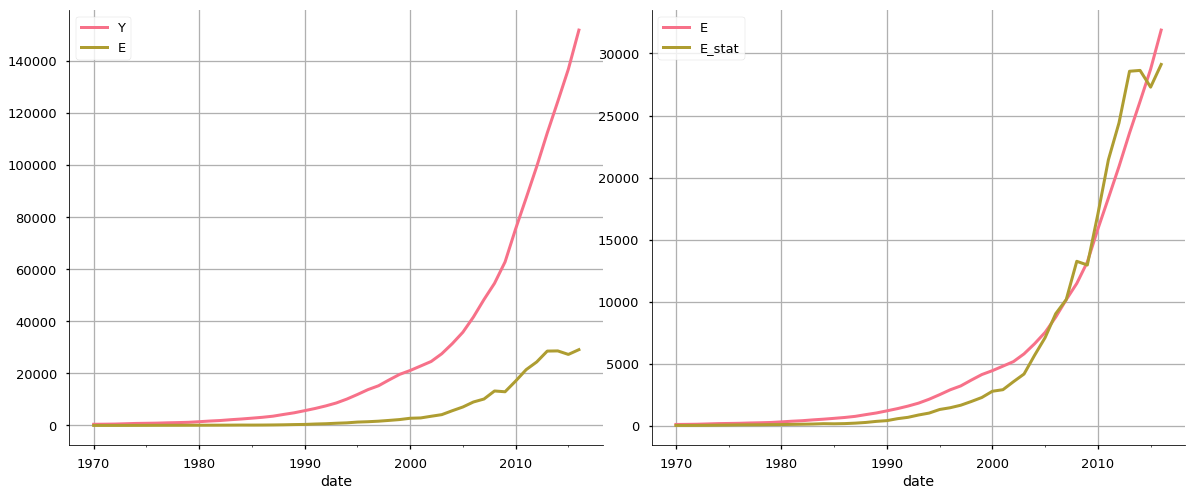

In [181]:
# Подбор аналитической функции E(t) = f(Y(t))
# Сравнение графиков
cmp = X_curr
cmp = cmp.drop(columns=['date', 'I', 'C', 'J', 'N'])
# Подстановка параметров
E = cmp
E = E.drop(columns=['Y'])
E['E'] = X_curr['Y'] * 0.21
E['E_stat'] = X_curr['E']

figure1 = plt.figure(figsize=(20, 8))
layout = (1, 4)
fig_start = plt.subplot2grid(layout, (0, 0), colspan=2)
fig_end = plt.subplot2grid(layout, (0, 2), colspan=2)
cmp.plot(ax=fig_start, alpha=1)
E.plot(ax=fig_end, alpha=1)
sb.despine()
fig_start.grid()
fig_end.grid()

#### (4) Импорт I(t)

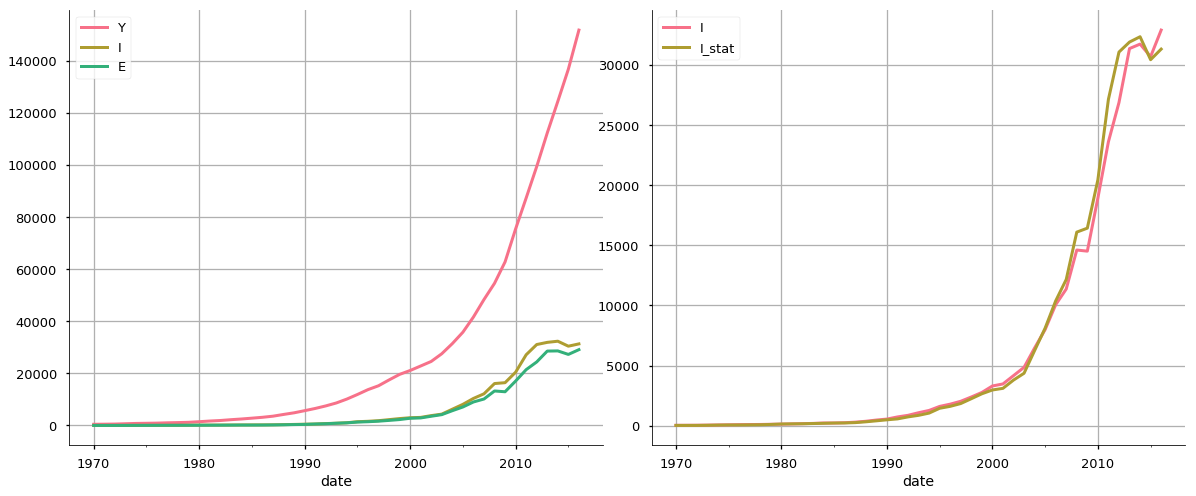

In [182]:
# Подбор аналитической функции I(t) = f(Y(t), E(t))
# Сравнение графиков
cmp = X_curr
cmp = cmp.drop(columns=['date', 'C', 'J', 'N'])
# Подбор параметров
I = cmp
I = I.drop(columns=['Y', 'E'])
I['I'] = X_curr['Y'] * 0.025 + 1 * X_curr['E']
I['I_stat'] = X_curr['I']

graph(I, cmp)

#### (5) Инвестиции J(t)

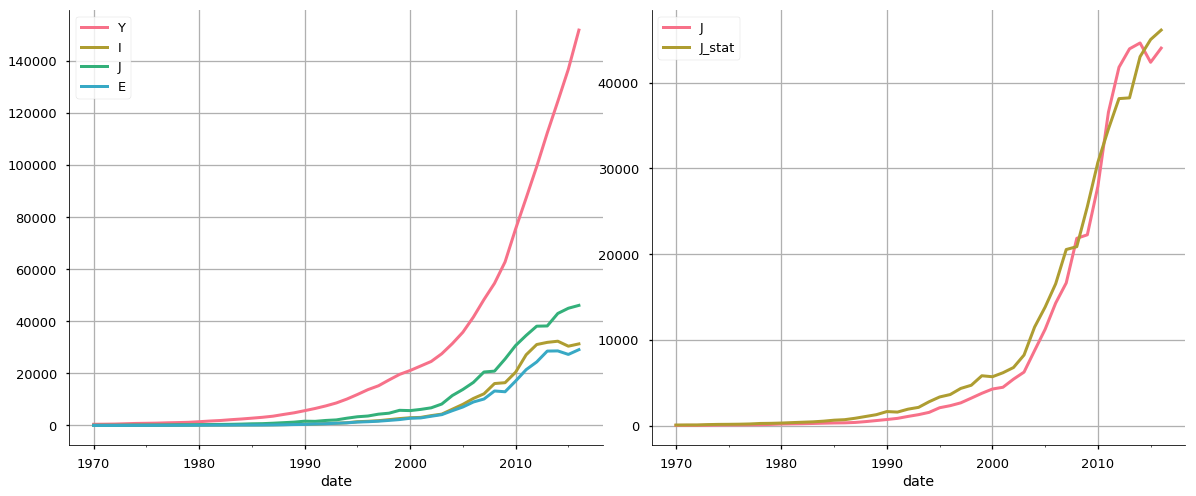

In [183]:
# Подбор аналитической функции J(t) = f(Y(t), I(t), E(t))
# Сравнение графиков
cmp = X_curr
cmp = cmp.drop(columns=['date', 'C', 'N'])
# Подстановка параметров
J = cmp
J = J.drop(columns=['Y', 'E', 'I'])
J['J'] = X_curr['Y'] * 0.015 + 0.25 * X_curr['E'] + 1.1 * X_curr['I']
J['J_stat'] = X_curr['J']

graph(J, cmp)

#### (6) Потребление Q(t)

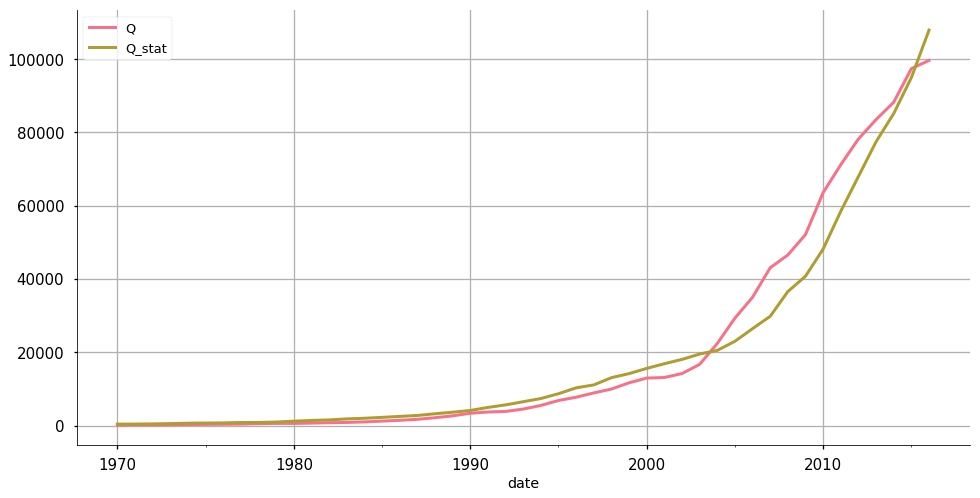

In [184]:
Q = pd.DataFrame(columns = ['date', 'Q', 'Q_stat'])
Q['date'] = X_curr['date']
Q['date'] = pd.to_datetime(Q['date'])
Q.index = Q['date']
Q = Q.drop(columns=['date'])
Q['Q'] = Y['Y'] + I['I'] - J['J'] - E['E']
Q['Q_stat'] = X_curr['Y'] + X_curr['I'] - X_curr['J'] - X_curr['E']

figure = Q.plot(figsize=(16, 8), fontsize=15)
figure.grid()
sb.despine()

# Part III

In [188]:
dates=pd.date_range('1/1/1970', '1/1/1999', freq='AS')
Y2 = Y.drop(dates)
E2 = E.drop(dates)
I2 = I.drop(dates)
J2 = J.drop(dates)
Q2 = Q.drop(dates)

In [186]:
def Theil_index(char, df, dt, dates):
    numerator = pd.DataFrame(columns=['date', 'value']) 
    numerator['date'] = dt['date']
    numerator = numerator.drop(dates)
    numerator = numerator.drop(columns=['date'])
    numerator['value'] = (df[char + '_stat'] - df[char]) ** 2
    a = numerator['value'].rolling(2016-t0+1).sum()['2016']
    denominator = pd.DataFrame(columns=['date', 'value']) 
    denominator['date'] = dt['date']
    denominator = denominator.drop(dates)
    denominator = denominator.drop(columns=['date'])
    denominator['value'] = (df[char + '_stat']) ** 2 + (df[char]) ** 2
    b = denominator['value'].rolling(2016-t0+1).sum()['2016']
    answer = math.sqrt(a / b)
    return answer

In [187]:
print ('Theil index for:')
print ('Y =', Theil_index('Y', Y2, X_curr, dates))
print ('E =', Theil_index('E', E2, X_curr, dates))
print ('I =', Theil_index('I', I2, X_curr, dates))
print ('J =', Theil_index('J', J2, X_curr, dates))
print ('Q =', Theil_index('Q', Q2, X_curr, dates))

Theil index for:
Y = 0.07190019475555191
E = 0.08940444641217893
I = 0.05636719849442605
J = 0.06950843771895228
Q = 0.10369579299224665


In [382]:
#относительные индексы цен π
pi = pd.DataFrame(columns = ['date', 'Y', 'I', 'C', 'J', 'E'])
pi['date'] = X_curr['date']
pi.index = pi['date']
pi = pi.drop(columns=['date'])

i = 0
while i < 5:
    name = number_to_column(i)
    pi[name] = price_index[name] / price_index['Y']
    i += 1
 
pi.head(n=3)

,Y,I,C,J,E
date,,,,,
1970,1.0,0.824618,1.118597,0.927443,0.855735
1971,1.0,0.732741,1.122344,0.919640,0.834430
1972,1.0,0.688250,1.103906,0.878505,0.841978


In [386]:
#продуктовый баланс, выраженный в индексах относительных цен
Q = pd.DataFrame(columns = ['date', 'value'])
Q['date'] = X_curr['date']
#Q['date'] = pd.to_datetime(Q['date'])
Q.index = Q['date']
Q = Q.drop(columns=['date'])
tmp = X_curr
tmp.index = tmp['date']
tmp = tmp.drop(columns=['date'])
Q['value'] = pi['C'] * tmp['C'] 
Q.head(n=5)

,value
date,
1970,457.963496
1971,499.378080
1972,539.245992
1973,638.525088
1974,807.720084


In [387]:
# параметры σ, δ, ρ
sigma = pd.DataFrame(columns = ['date', 'value'])
sigma['date'] = X_curr['date']
sigma.index = sigma['date']
sigma = sigma.drop(columns=['date'])

delta = pd.DataFrame(columns = ['date', 'value'])
delta['date'] = X_curr['date']
delta.index = delta['date']
delta = delta.drop(columns=['date'])

ro = pd.DataFrame(columns = ['date', 'value'])
ro['date'] = X_curr['date']
ro.index = ro['date']
ro = ro.drop(columns=['date'])

tmp = X_curr
tmp.index = tmp['date']
tmp = tmp.drop(columns=['date'])

sigma['value'] = pi['J'] * tmp['J'] / (tmp['Y'] + pi['I'] * tmp['I'])
delta['value'] = pi['E'] * tmp['E'] / tmp['Y']
ro['value'] = pi['I'] / (tmp['Y'] - pi['E'] * tmp['E'])

#ro.head(n=50)

In [390]:
# параметр γ
tmp1 = X_curr
tmp1 = tmp1.drop(columns = ['Y', 'I', 'C', 'J', 'E', 'date'])
tmp1['N']['1970'] = 1
i = 1971
while i <= 2016:
    tmp1['N'][str(i)] = X_curr['N'][str(i)] / X_curr['N'][str(i-1)]
    i = i + 1
    
gamma = tmp1['N'].mean()
print ("gamma = ", gamma)

gamma =  1.0187406268269454
